In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import imageio
from mpl_toolkits.mplot3d import Axes3D
import random

In [ ]:
def print_a_circle(file_lines, start_row, end_row, r, lifetime):    
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    for i in range (start_row, end_row):
        x_centre = file_lines[i][0]        
        y_centre = file_lines[i][1]        
        z_centre = file_lines[i][2]
        #age = file_lines[i][3]
        if (x_centre == 0 and y_centre == 0 and z_centre ==0):
            continue
        else:
#             current_rad = (r/4)*(1+age/lifetime)
            current_rad = r
            x = current_rad * np.outer(np.cos(u), np.sin(v)) + x_centre
            y = current_rad * np.outer(np.sin(u), np.sin(v)) + y_centre
            z = current_rad * np.outer(np.ones(np.size(u)), np.cos(v)) + z_centre
            ax.plot_surface(x, y, z,  rstride=4, cstride=4, color='b', linewidth=0, alpha=0.3)


In [ ]:
def find_the_max_and_min_coordinates(file_lines):
    x_max = (np.array(file_lines).max(axis=0))[0]
    y_max = (np.array(file_lines).max(axis=0))[1]
    z_max = (np.array(file_lines).max(axis=0))[2]
    x_min = (np.array(file_lines).min(axis=0))[0]
    y_min = (np.array(file_lines).min(axis=0))[1]
    z_min = (np.array(file_lines).min(axis=0))[2]
    return x_max, y_max, z_max, x_min, y_min, z_min

In [11]:
file_lines = []
with open ("3doutput.txt") as my_file:
    for line in my_file:
        line = line.strip()
        temp = line.split(",")
        #file_lines.append([float(temp[0]), float(temp[1]), float(temp[2]), float(temp[3])])     
        file_lines.append([float(temp[0]), float(temp[1]), float(temp[2])])     

x_max, y_max, z_max, x_min, y_min, z_min = find_the_max_and_min_coordinates(file_lines)

In [12]:
max_line = (len(file_lines))
start_line = 0
#while start_line < 10:
while start_line < max_line - 9:
    fig = plt.figure()
 
    fig.suptitle('Startline = {}'.format(start_line), fontsize=12)
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax = plt.gca()
    ax.set_xlim3d((x_min, x_max))
    ax.set_ylim3d((y_min, y_max))
    ax.set_zlim3d((z_min, z_max))
    xs = []
    ys = []
    zs = []
#     for i in range (start_line, start_line + 10):
#         xs.append(file_lines[i][0])
#         ys.append(file_lines[i][1])
#         zs.append(file_lines[i][2])
#     ax.scatter(xs, ys, zs)
    print_a_circle(file_lines, start_line, start_line+10, 0.25, 10)
    plt.savefig("Startline = {}".format(start_line))
    plt.close()

    
    start_line += 10


In [14]:
filenames= ["Startline = {}.png".format(10*x) for x in range(50)]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('output_basic.gif', images, fps=5)

In [17]:
def print_lots_of_circle(positions, r, my_color):    
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)

    x_centre = positions[0]        
    y_centre = positions[1]        
    z_centre = positions[2]    
    x = r * np.outer(np.cos(u), np.sin(v)) + x_centre
    y = r * np.outer(np.sin(u), np.sin(v)) + y_centre
    z = r * np.outer(np.ones(np.size(u)), np.cos(v)) + z_centre
    #ax.plot_surface(x, y, z,  rstride=4, cstride=4, color=my_color, linewidth=0, alpha=0.3)
    return x,y,z

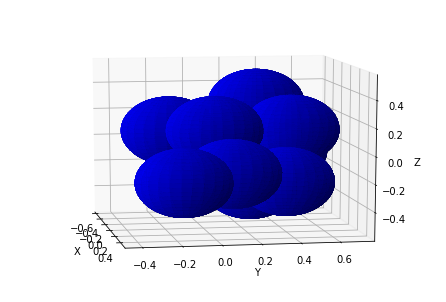

In [18]:
start_line = len(file_lines)-10
positions = []
for i in range(start_line, start_line + 10):
    positions.append(file_lines[i])
    

fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
xs = []
ys = []
zs = []
for jj in range(len(positions)):
    x,y,z = print_lots_of_circle(positions[jj], 0.25, "r")
    xs.append(x)
    ys.append(y)
    zs.append(z)
for ii in range(0,360,10):
    ax.view_init(elev=10., azim=ii)
    for kk in range(len(positions)):
        ax.plot_surface(xs[kk], ys[kk], zs[kk],  rstride=4, cstride=4, color="b", linewidth=0, alpha=0.1)
    plt.savefig("Last, angle={}".format(ii))
    #plt.close()

In [84]:
filenames= ["Last, angle={}.png".format(10*x) for x in range(36)]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('output_123.gif', images, fps=5)

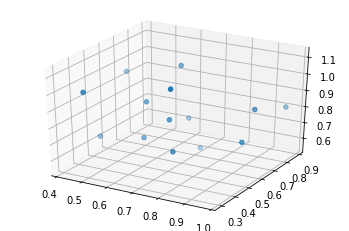

In [118]:
start_line = len(file_lines)-40
xs = []
ys =[]
zs = []
points = []
for i in range(start_line, start_line + 40):
    if file_lines[i][0] == 0 and file_lines[i][1]==0 and file_lines[i][2] ==0:
        continue
    else:
        xs.append(file_lines[i][0])
        ys.append(file_lines[i][1])
        zs.append(file_lines[i][2])
        points.append(file_lines[i])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs)


In [99]:
from scipy.spatial import ConvexHull  
hull = ConvexHull(points)

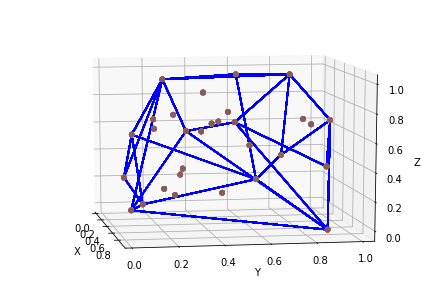

In [132]:
points = np.random.rand(30,3)
xpoints=points[:,0]
ypoints=points[:,1]
zpoints = points[:,2]

hull = ConvexHull(points)  
    
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
for ii in range(0,360,10):
    ax.view_init(elev=10., azim=ii)
    ax.scatter(xpoints, ypoints, zpoints, 'r')
    for simplex in hull.simplices:

        plt.plot(points[simplex, 0], points[simplex, 1], points[simplex,2], 'b-')
    plt.savefig("azim={}".format(ii))

In [133]:
filenames= ["azim={}.png".format(10*x) for x in range(36)]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave('output.gif', images, fps=5)

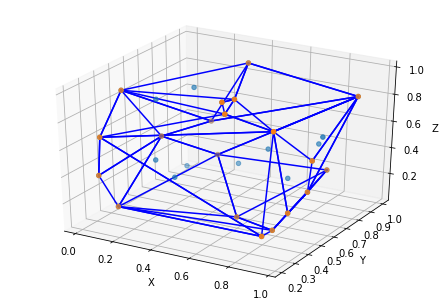

In [150]:
points = np.random.rand(30,3)
xpoints=points[:,0]
ypoints=points[:,1]
zpoints = points[:,2]

hull = ConvexHull(points)  
    
fig = plt.figure()
ax = Axes3D(fig)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.scatter(xpoints, ypoints, zpoints, 'r')
ax.scatter(points[hull.vertices,0], points[hull.vertices,1], points[hull.vertices,2], 'g')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], points[simplex,2], 'b-')
